# Batch Normalization

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("../data", one_hot=True)

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


In [3]:
def dense(x, size):
    return tf.layers.dense(x, size)


def dense_batch_relu(x, size, phase, scope, use_bn):
    with tf.variable_scope(scope):
        hidden = tf.layers.dense(x, size)
        if use_bn:
            hidden = tf.layers.batch_normalization(hidden, training=phase)
        return tf.nn.relu(hidden, 'relu')

## 使用Batch Norm

In [4]:
x = tf.placeholder(tf.float32, (None, 784), name='x')
y = tf.placeholder(tf.float32, (None, 10), name='y')
phase = tf.placeholder(tf.bool, name='phase')

h1 = dense_batch_relu(x, 100, phase, 'layer1', True)
h2 = dense_batch_relu(h1, 100, phase, 'layer2', True)
logits = tf.layers.dense(h2, 10, name='logits')

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)),
            'float32'))

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))

## 使用Batch Norm训练

In [5]:
def train():
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    history = []
    iterep = 500
    for i in range(iterep * 50):
        x_train, y_train = mnist.train.next_batch(100)
        sess.run(train_step,
                 feed_dict={x: x_train,
                            y: y_train,
                            phase: True})
        if (i + 1) % iterep == 0:
            epoch = (i + 1) / iterep
            tr = sess.run([loss, accuracy],
                          feed_dict={x: mnist.train.images,
                                     y: mnist.train.labels,
                                     phase: False})
            t = sess.run([loss, accuracy],
                         feed_dict={x: mnist.test.images,
                                    y: mnist.test.labels,
                                    phase: False})
            history += [[epoch] + tr + t]
            print(history[-1])
    sess.close()
    return history


history1 = train()

[1.0, 0.40137705, 0.8998182, 0.3858707, 0.9018]
[2.0, 0.2806317, 0.9247091, 0.27438384, 0.9254]
[3.0, 0.22669865, 0.93874544, 0.22603792, 0.9381]
[4.0, 0.19536221, 0.9470909, 0.19791147, 0.9447]
[5.0, 0.1734483, 0.9527636, 0.17962256, 0.948]
[6.0, 0.15571256, 0.95723635, 0.16360001, 0.9527]
[7.0, 0.14160381, 0.9613091, 0.15172392, 0.9575]
[8.0, 0.12988809, 0.9646364, 0.14286597, 0.9598]
[9.0, 0.12024695, 0.9670909, 0.13339405, 0.9612]
[10.0, 0.111391746, 0.96943635, 0.12736762, 0.963]
[11.0, 0.10324777, 0.97163635, 0.12148499, 0.9647]
[12.0, 0.09701563, 0.9738182, 0.11781232, 0.9665]
[13.0, 0.090735845, 0.97545457, 0.11264336, 0.9676]
[14.0, 0.08532423, 0.9768909, 0.10847037, 0.9688]
[15.0, 0.08128813, 0.97825456, 0.10744117, 0.9691]
[16.0, 0.07693244, 0.9789818, 0.10325988, 0.9695]
[17.0, 0.07256918, 0.9807818, 0.09992581, 0.9713]
[18.0, 0.06882917, 0.9823818, 0.09901622, 0.9712]
[19.0, 0.06508247, 0.9831273, 0.096344106, 0.9718]
[20.0, 0.06166885, 0.9845818, 0.094008885, 0.9728]
[21.

## 不使用batch norm

In [6]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 784), name='x')
y = tf.placeholder(tf.float32, (None, 10), name='y')
phase = tf.placeholder(tf.bool, name='phase')

h1 = dense_batch_relu(x, 100, phase, 'layer1', False)
h2 = dense_batch_relu(h1, 100, phase, 'layer2', False)
logits = tf.layers.dense(h2, 10, name='logits')

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1)),
            'float32'))

with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
    
    

history2 = train()
    

[1.0, 0.6498414, 0.8379273, 0.6246234, 0.8489]
[2.0, 0.43222865, 0.8804727, 0.41078734, 0.8882]
[3.0, 0.3671055, 0.8951273, 0.34911644, 0.9022]
[4.0, 0.32889432, 0.90721816, 0.31370074, 0.9103]
[5.0, 0.3034223, 0.91385454, 0.28935385, 0.9169]
[6.0, 0.2855278, 0.91843635, 0.27207676, 0.9215]
[7.0, 0.2695909, 0.9225818, 0.25709072, 0.9254]
[8.0, 0.25538233, 0.9270727, 0.24466424, 0.9302]
[9.0, 0.2438283, 0.9296727, 0.23418146, 0.9339]
[10.0, 0.23258966, 0.93389094, 0.22460076, 0.9352]
[11.0, 0.22340472, 0.9361454, 0.21660376, 0.9372]
[12.0, 0.2143105, 0.9386182, 0.20947392, 0.9394]
[13.0, 0.20672713, 0.9407273, 0.20161308, 0.9415]
[14.0, 0.19838502, 0.94363636, 0.19403644, 0.9437]
[15.0, 0.19125257, 0.9449818, 0.18751569, 0.9457]
[16.0, 0.18384531, 0.9480364, 0.18150459, 0.9471]
[17.0, 0.17833501, 0.9484909, 0.17681935, 0.9478]
[18.0, 0.17220014, 0.9506909, 0.1730573, 0.9494]
[19.0, 0.1671192, 0.9524, 0.16807269, 0.952]
[20.0, 0.16268423, 0.95378184, 0.16479978, 0.9517]
[21.0, 0.15668821

## 绘图比较

Populating the interactive namespace from numpy and matplotlib


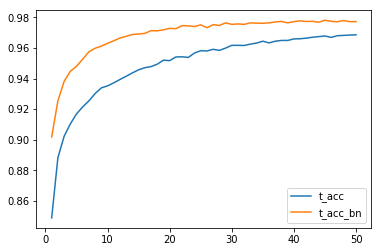

In [7]:
%pylab inline
history_bn = np.array(history1)
history = np.array(history2)
 
plt.plot(history[:, 0], history[:, -1], label='t_acc')
plt.plot(history_bn[:, 0], history_bn[:, -1], label='t_acc_bn') 
plt.legend()

